In [19]:
# 불필요한 경고 메시지 삭제
import warnings
warnings.filterwarnings('ignore')

In [20]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(
  iris_data.data,
  iris_data.target,
  test_size=0.2,
  random_state=11
)

In [21]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

# Graphviz 시각화
- Tree 모델이 어떻게 했는가를 시각화하기 위한 도구

In [22]:
from sklearn.tree import export_graphviz

In [23]:
export_graphviz(dt_clf,
                out_file="tree.dot",
                class_names = iris_data.target_names, #각 클래스의 문자열 이름
                feature_names = iris_data.feature_names,# 각 특성의 이름
                impurity= True,
                filled = True
                )

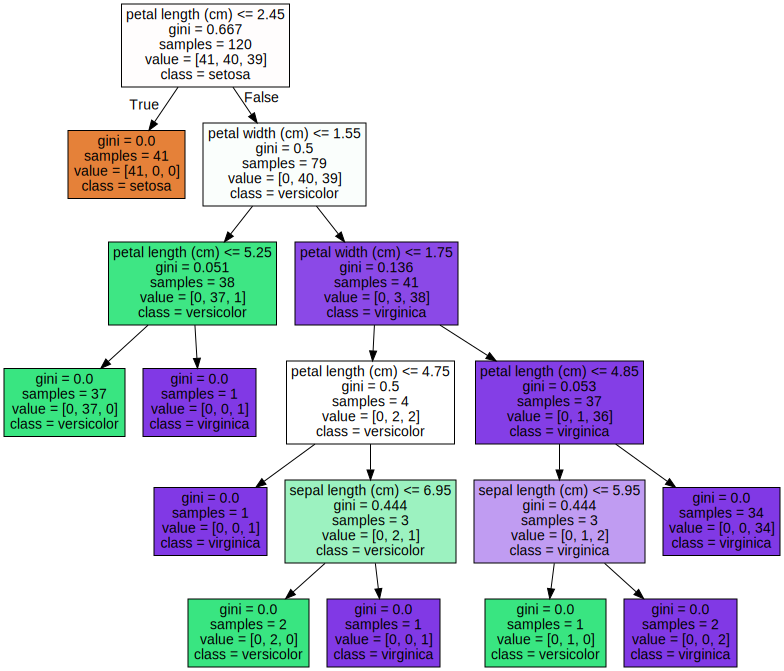

In [24]:
import graphviz

with open("tree.dot") as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)

In [25]:
#정확도 확인
from sklearn.metrics import accuracy_score

train_pred = dt_clf.predict(X_train)
test_pred = dt_clf.predict(X_test) #새로운 데이터에 대한 예측

print(accuracy_score(y_train, train_pred))
print(accuracy_score(y_test, test_pred))

1.0
0.8666666666666667


# max_depth를 이용한 질문의 깊이 제어 

In [26]:
dt_clf_depth_2 = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)

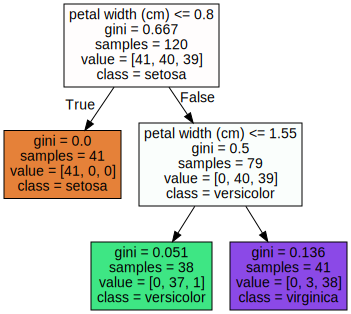

In [27]:
export_graphviz(
    dt_clf_depth_2, # 시각화할 모델
    out_file="tree.dot", # 시각화 결과물 파일 경로
    class_names=iris_data.target_names, # 각 클래스의 문자열 이름
    feature_names=iris_data.feature_names, # 각 특성(feature)의 이름
    impurity=True,
    filled=True
)

with open("tree.dot") as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)

In [28]:
#정확도 확인
train_pred = dt_clf_depth_2.predict(X_train)
test_pred = dt_clf_depth_2.predict(X_test)

print(accuracy_score(y_train, train_pred))
print(accuracy_score(y_test, test_pred))

0.9666666666666667
0.8666666666666667


# 기타 파라미터 

데이터 로드 


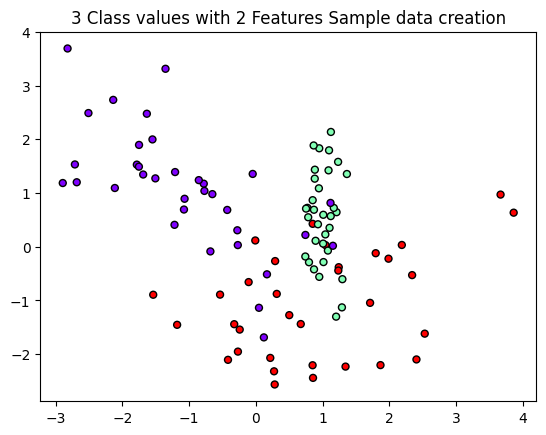

In [29]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성. 
X_features, y_labels = make_classification(
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_classes=3,
    n_clusters_per_class=1,
    random_state=0
)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨. 
plt.scatter(
    X_features[:, 0],
    X_features[:, 1],
    marker='o',
    c=y_labels,
    s=25,
    cmap='rainbow',
    edgecolor='k'
)
plt.show()

In [30]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

기본 결정 트리 모델 확인 

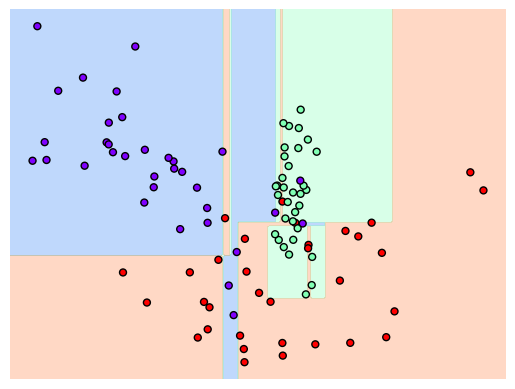

In [31]:
from sklearn.tree import DecisionTreeClassifier

# 모델 복잡도 조정하지 않은 의사결정나무모델은 과대적합
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)

visualize_boundary(dt_clf, X_features, y_labels)

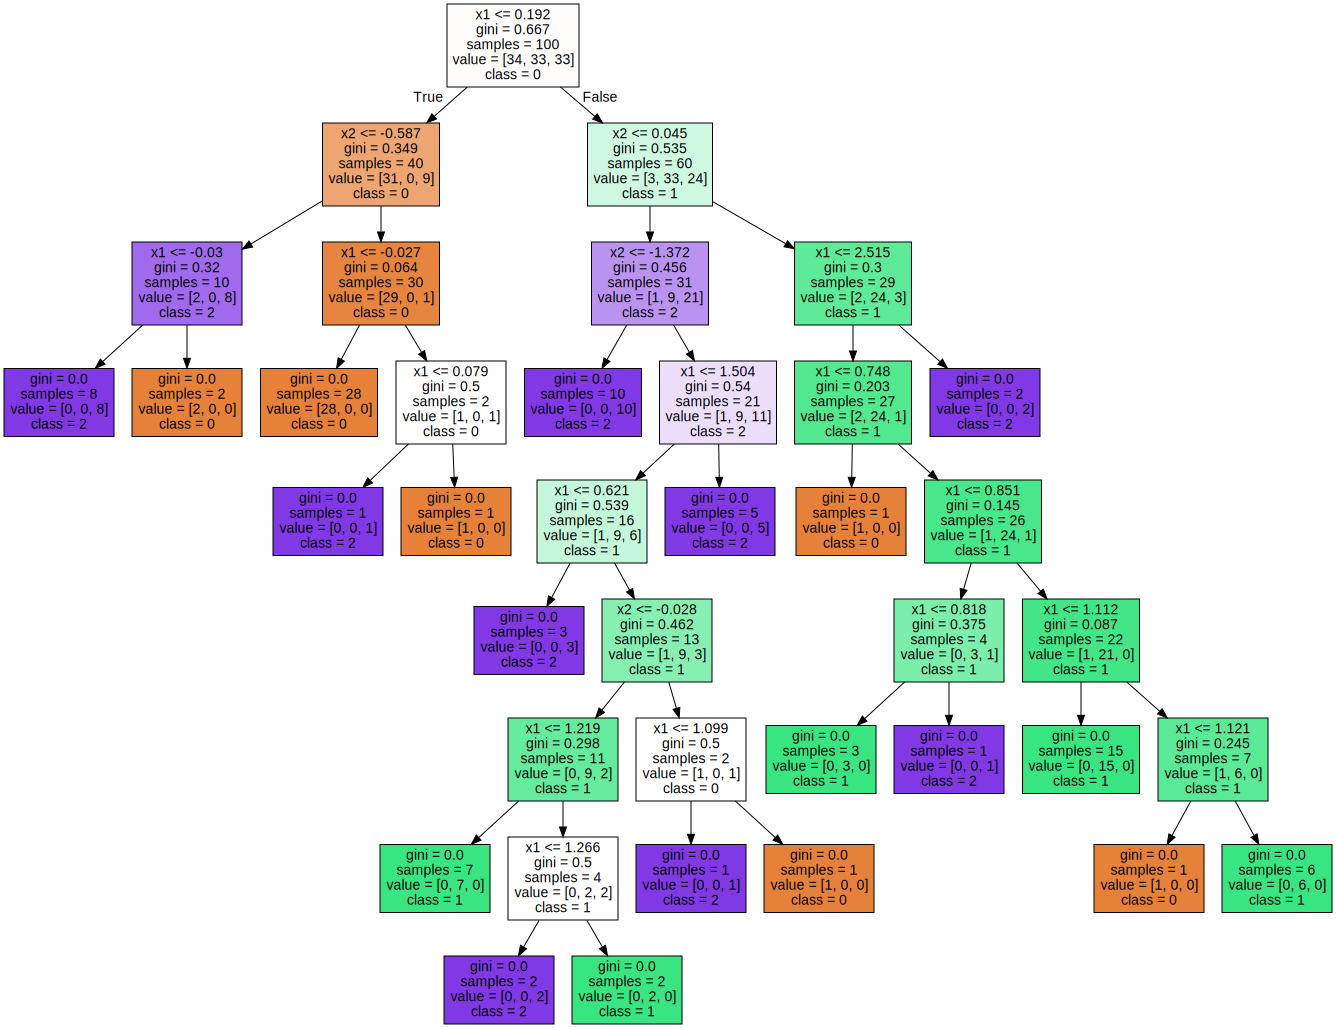

In [32]:
export_graphviz(dt_clf, out_file="tree.dot", class_names=["0", "1", "2"], feature_names=["x1", "x2"], impurity=True, filled=True)
# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

max_depth 

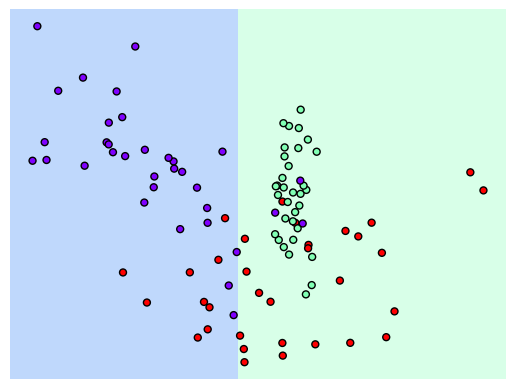

In [33]:
dt_clf = DecisionTreeClassifier(max_depth=1).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

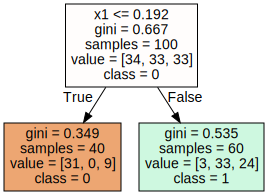

In [34]:
export_graphviz(dt_clf, out_file="tree.dot", class_names=["0", "1", "2"], feature_names=["x1", "x2"], impurity=True, filled=True)
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

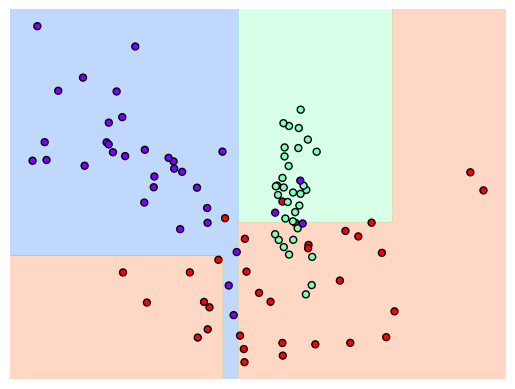

In [35]:
# max_depth = 3
dt_clf = DecisionTreeClassifier(max_depth=3).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)
#이 경우 standard scaling 필요해보임

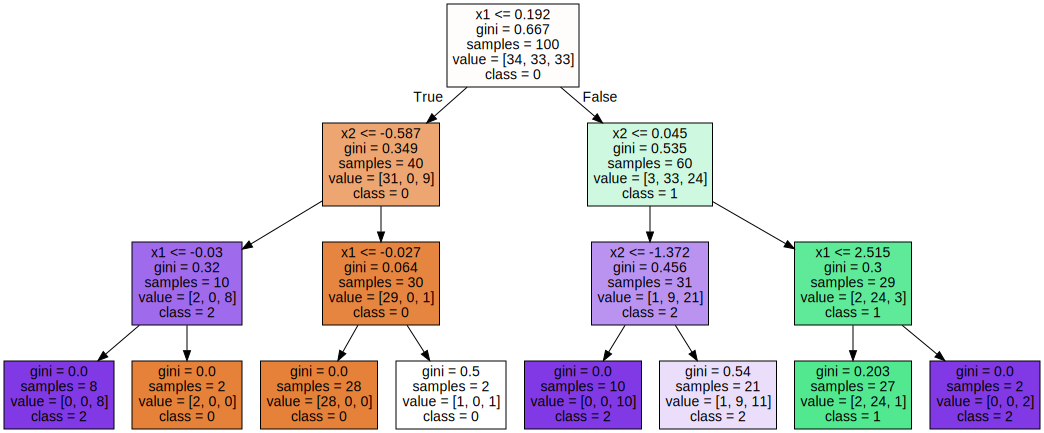

In [36]:
export_graphviz(dt_clf, out_file="tree.dot", class_names=["0", "1", "2"], feature_names=["x1", "x2"], impurity=True, filled=True)
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

min_samples_split 

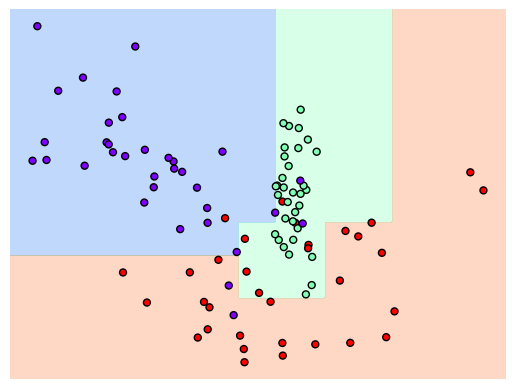

In [37]:
dt_clf = DecisionTreeClassifier(min_samples_split=20).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)
# sample 수 몇개를 기준으로 더이상 질문지를 만들지 않겠다 (짤리지 않는 데이터 개수 설정)
# 데이터가 너무 많을 때는 max_depth 만 조절 -> min_samples_split 은 보조적인 설정으로 사용

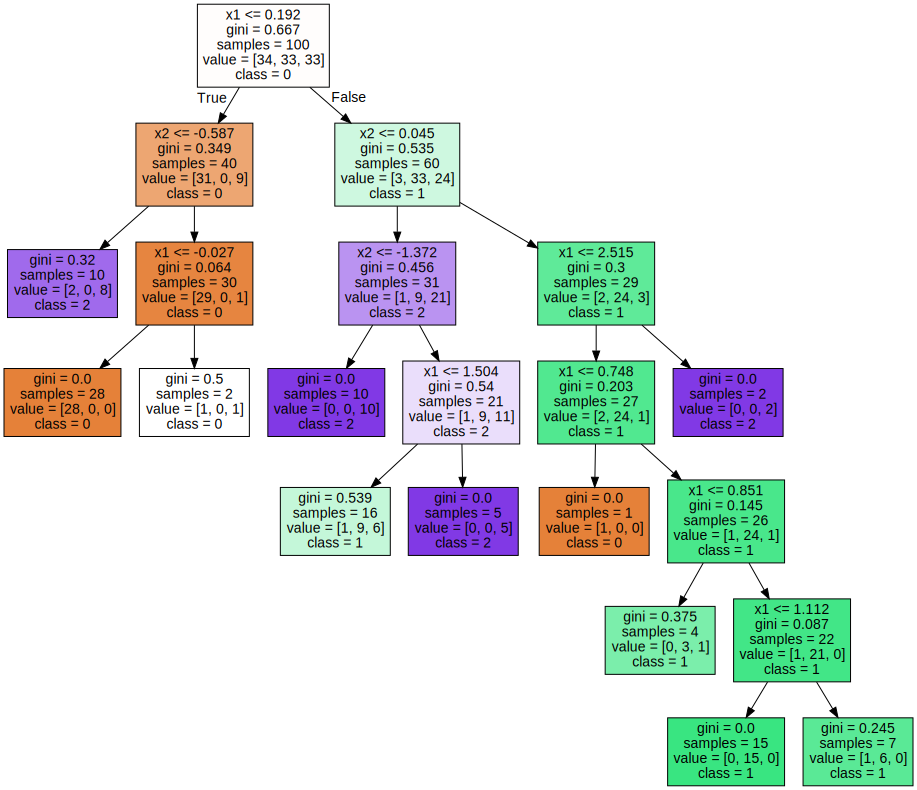

In [38]:
export_graphviz(dt_clf, out_file="tree.dot", class_names=["0", "1", "2"], feature_names=["x1", "x2"], impurity=True, filled=True)
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)
#leaf node가 순수노드(gini=0)가 아님 (20개 미만 안짤리기 때문)

min_samples_leaf 

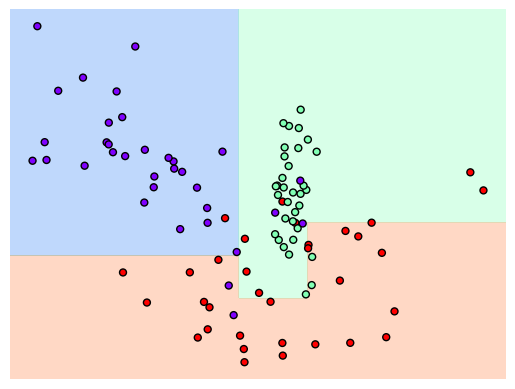

In [39]:
#짜르고 난 후 개수
#설정한 데이터 수 보다 작은 개수를 가지면 안자름
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

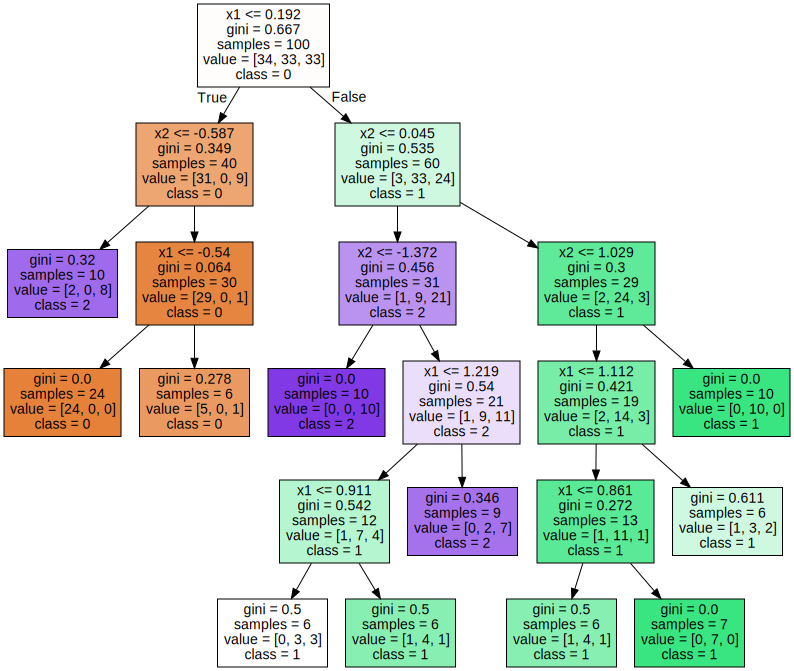

In [40]:
export_graphviz(dt_clf, out_file="tree.dot", class_names=["0", "1", "2"], feature_names=["x1", "x2"], impurity=True, filled=True)
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

특성 중요도
- 이 모델이 어떠한 특성을 중요하게 생각하는지
- 어떤 feature가 균등도를 최대로 만드는데에 가장 크게 기여를 하는지

In [41]:
dt_clf_iris = DecisionTreeClassifier().fit(X_train, y_train)
dt_clf_iris.feature_importances_

array([0.03334028, 0.00833507, 0.53823268, 0.42009198])

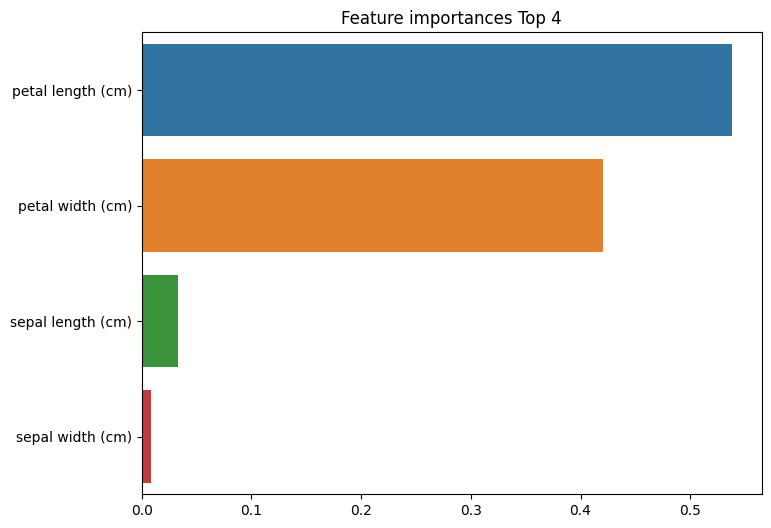

In [42]:
import pandas as pd
def plot_feature_importance(model, columns, limit=None):
  import seaborn as sns

  ftr_importances_values = model.feature_importances_
  # Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
  ftr_importances = pd.Series(ftr_importances_values, index=columns  )
  # 중요도값 순으로 Series를 정렬
  ftr_top = ftr_importances.sort_values(ascending=False)[:limit]
  plt.figure(figsize=(8,6))
  plt.title(f'Feature importances Top {len(columns) if limit == None else limit}')
  sns.barplot(x=ftr_top , y = ftr_top.index)
  plt.show()

plot_feature_importance(dt_clf_iris, iris_data.feature_names)

In [ ]:
import seaborn as sns

iris_df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)